In [1]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import torch
import os
from run.predict.attribute_predictor_custom import AttributePredictor
from db.faiss_attribute_cos import MultiFeatureStyleSearcher
# 
# 모델 및 프로세서 불러오기
processor = SegformerImageProcessor.from_pretrained("mattmdjaga/segformer_b2_clothes")
model = AutoModelForSemanticSegmentation.from_pretrained("mattmdjaga/segformer_b2_clothes")


c:\Users\user\anaconda3\envs\kfashion\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 모델 불러오기

In [2]:
predictor = AttributePredictor()
searcher = MultiFeatureStyleSearcher()

## 이미지 크롤링

## 이미지 전처리

In [3]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm  # tqdm 모듈 추가

# 이미지가 있는 폴더 경로
input_folder = 'C:\SS\AI_project_data\크롤링\img'  # 입력 폴더 경로
output_folder = 'C:\SS\AI_project_data\크롤링\processing_img'  # 출력 폴더 경로

# 출력 폴더가 없으면 생성
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 카테고리와 모델 레이블 매핑
clothes_labels = {
    "바지": 6,          # Pants
    "점퍼": 4,         # Upper-clothes
    "니트": 4,         # Upper-clothes
    "티셔츠": 4,       # Upper-clothes
    "자켓": 4,         # Upper-clothes
    "세트": 4,         # Upper-clothes
    "코트": 4,         # Upper-clothes
    "베스트": 4,       # Upper-clothes
    "블라우스": 4,     # Upper-clothes
    "가디건": 4,       # Upper-clothes
    "데님": 6,         # Pants
    "남방": 4,         # Upper-clothes
    "스커트": 5,       # Skirt
    "원피스": 7,       # Dress
    "티셔츠나시": 4,   # Upper-clothes
    "레깅스": 6,       # Pants
    "머플러": 17,      # Scarf
    "블라우스나시": 4, # Upper-clothes
    "니트나시": 4,     # Upper-clothes
    "신발": 9,         # Left-shoe
    "이너웨어": 4,     # Upper-clothes
    "모자": 1,         # Hat
    "가방": 16         # Bag
}

# 원하는 카테고리 입력 (예: ["바지", "스커트"])
desired_categories = ["가디건"]  # 여기에 원하는 카테고리를 추가하세요
desired_labels = [clothes_labels[cat] for cat in desired_categories if cat in clothes_labels]

# 이미지 전처리 및 저장
for filename in tqdm(os.listdir(input_folder), desc="Processing Images"):  # tqdm으로 진행상황 표시
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일 형식 확인
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # 이미지 전처리
        inputs = processor(images=image, return_tensors="pt")

        # 모델 예측
        outputs = model(**inputs)
        logits = outputs.logits.cpu()

        # 이미지 크기에 맞게 로짓스 크기 조정
        upsampled_logits = nn.functional.interpolate(
            logits,
            size=image.size[::-1],
            mode="bilinear",
            align_corners=False,
        )

        # 예측된 segmentation 맵 생성
        pred_seg = upsampled_logits.argmax(dim=1)[0].numpy()

        # 각각의 옷 부분을 저장
        for label in desired_labels:
            # 해당 옷 레이블에 맞는 마스크 생성
            cloth_mask = pred_seg == label
            
            # 원본 이미지에 해당하는 옷 부분만 남기고 나머지는 검정색 처리
            cloth_image = np.array(image).copy()
            cloth_image[~cloth_mask] = 0
            
            # PIL 이미지로 변환하여 저장
            output_image = Image.fromarray(cloth_image)
            output_image_path = os.path.join(output_folder, f"{label}_{filename}")
            output_image.save(output_image_path)

# 모든 이미지가 처리되었습니다.

<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user\AppData\Local\Temp\ipykernel_4460\3035521595.py:7: SyntaxWarning: invalid escape sequence '\S'
  input_folder = 'C:\SS\AI_project_data\크롤링\img'  # 입력 폴더 경로
C:\Users\user\AppData\Local\Temp\ipykernel_4460\3035521595.py:8: SyntaxWarning: invalid escape sequence '\S'
  output_folder = 'C:\SS\AI_project_data\크롤링\processing_img'  # 출력 폴더 경로
Processing Images:  72%|███████▎  | 87/120 [02:34<00:58,  1.78s/it]
C:\Users\user\AppData\Local\Temp\ipykernel_4460\3035521595.py:7: SyntaxWarning: invalid escape sequence '\S'
  input_folder = 'C:\SS\AI_project_data\크롤링\img'  # 입력 폴더 경로
C:\Users\user\AppData\Local\Temp\ipykernel_4460\3035521595.py:8: SyntaxWarning: invalid escape sequence '\S'
  output_folder = 'C:\SS\AI_project_data\크롤링\processing_img'  # 출력 폴더 경로


ValueError: Unable to infer channel dimension format

## feature extract

In [ ]:
    image_folder = 'img/이미지인덱싱'  # 이미지가 있는 폴더 경로
    output_folder = 'output/db'  # CSV 파일을 저장할 폴더 경로

    # 출력 폴더가 없으면 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    extract_category_features_to_csv(image_folder, output_folder)

## faiss

Upper-clothes에 대해 처리 중... (이미지 크기: 390x468)


<>:45: SyntaxWarning: invalid escape sequence '\S'
<>:45: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user\AppData\Local\Temp\ipykernel_2308\4224984743.py:45: SyntaxWarning: invalid escape sequence '\S'
  img_path = os.path.join('C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱', f'{image_idx}.jpg')  # 이미지 경로 생성



Category 예측:
   1. 티셔츠
   2. 팬츠
   3. 스커트

Detail 예측:
   1. 드롭숄더
   2. 포켓
   3. 단추

Texture 예측:
   1. 우븐
   2. 데님
   3. 저지

Print 예측:
   1. 레터링
   2. 그래픽
   3. 무지
{'category': ['2430', '2598', '5475', '5119', '5131'], 'texture': ['4792', '1061', '4575', '2024', '2146'], 'print': ['3472', '615', '301', '15', '2966'], 'details': ['1620', '1559', '5037', '5142', '2349']}

Category 추천 이미지:

Texture 추천 이미지:
이미지 C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱\1061.jpg을 찾을 수 없습니다.
이미지 C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱\4575.jpg을 찾을 수 없습니다.
이미지 C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱\2146.jpg을 찾을 수 없습니다.

Print 추천 이미지:
이미지 C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱\301.jpg을 찾을 수 없습니다.

Details 추천 이미지:
이미지 C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱\1620.jpg을 찾을 수 없습니다.
이미지 C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱\1559.jpg을 찾을 수 없습니다.
Pants에 대해 처리 중... (이미지 크기: 390x468)

Category 예측:
   1. 청바지
   2. 팬츠
   3. 조거팬츠

Detail 예측:
   1. 롤업
   2.

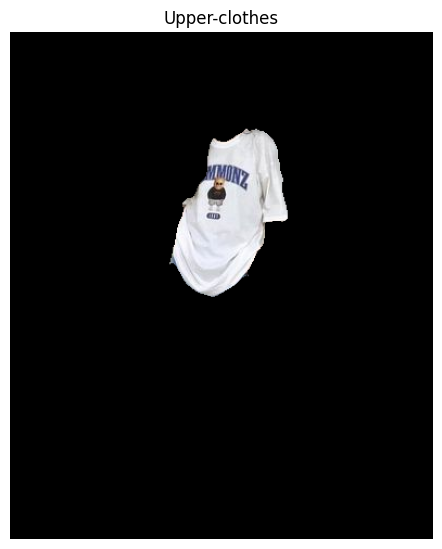

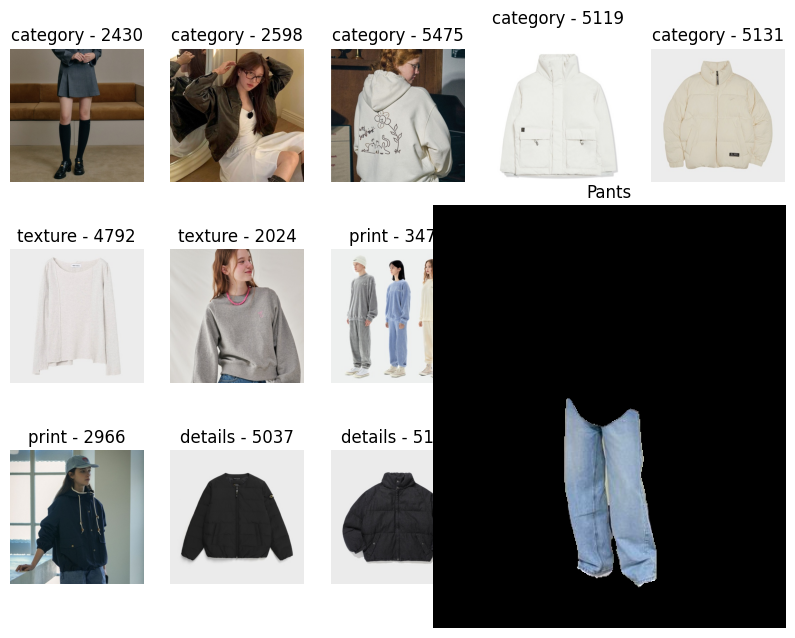

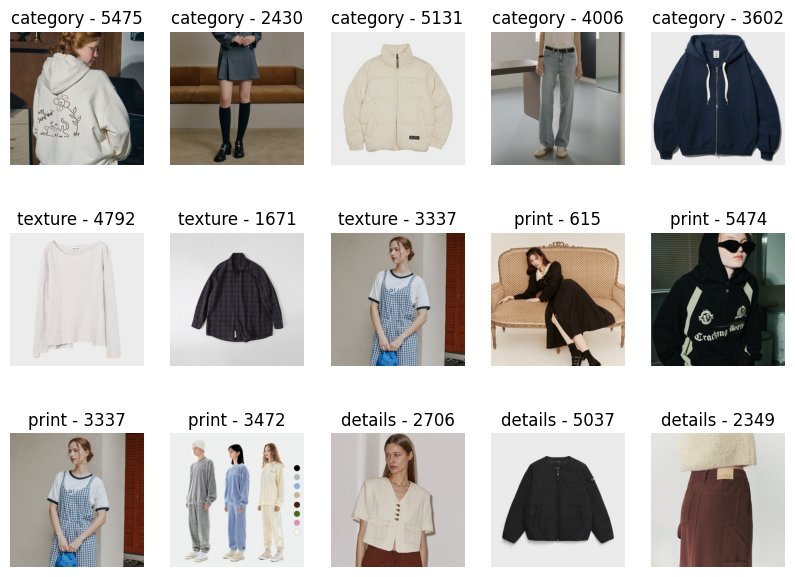

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def process_segmented_clothes(segmented_images, predictor, min_size=50):
    # 시각화를 위한 subplot 설정
    num_images = len(segmented_images)
    plt.figure(figsize=(12, 12))
    
    for i, (cloth_name, img) in enumerate(segmented_images.items(), 1):
        # 이미지 크기 확인 (너비와 높이)
        width, height = img.size
        print(f"{cloth_name}에 대해 처리 중... (이미지 크기: {width}x{height})")

        # 이미지가 너무 작으면 무시
        if width < min_size or height < min_size:
            print(f"{cloth_name} 이미지가 너무 작아 처리하지 않음.")
            continue
        
        # 이미지 시각화
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(cloth_name)
        plt.axis("off")
        
        # 배경이 제거된 이미지로 예측 수행
        results = predictor.predict(img)
        recom = searcher.get_similar_images_json(img)
        
        # 예측 결과 출력
        for model_name, predictions in results.items():
            print(f"\n{model_name.capitalize()} 예측:")
            for i, label in enumerate(predictions, 1):
                print(f'   {i}. {label}')
        
        # recom에서 반환된 유사 이미지 인덱스를 이용해 해당 이미지를 시각화
        print(recom)
        plt.figure(figsize=(10, 10))  # recom 이미지를 위한 새로운 figure 생성
        num_recom = sum(len(v) for v in recom.values())  # 추천된 모든 이미지 수 계산
        idx = 1  # subplot 인덱스
        
        for model_name, image_indices in recom.items():
            print(f"\n{model_name.capitalize()} 추천 이미지:")
            for image_idx in image_indices:
                img_path = os.path.join('C:\SS\AI_project_data\kfashoin_ai_model\img\이미지인덱싱', f'{image_idx}.jpg')  # 이미지 경로 생성
                if os.path.exists(img_path):
                    # 이미지 불러오기
                    recom_img = Image.open(img_path)
                    # subplot에 이미지 추가
                    plt.subplot(len(recom), len(image_indices), idx)
                    plt.imshow(recom_img)
                    plt.title(f'{model_name} - {image_idx}')
                    plt.axis("off")
                    idx += 1
                else:
                    print(f"이미지 {img_path}을 찾을 수 없습니다.")
    
    # 시각화된 이미지를 보여줌
    plt.show()

# segmented_clothes 딕셔너리를 전달하여 메서드 호출
process_segmented_clothes(segmented_clothes, predictor)
